In [12]:
#Import 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets
from pprint import pprint


In [13]:
#Read CSV and make dataframe
path = 'Data/vgsales.csv'
video_games_df = pd.read_csv(path)
video_games_df = video_games_df.rename(columns = {"Publisher": "Publisher",
                                                 "NA_Sales": "North American Sales",
                                                 "EU_Sales": "European Sales",
                                                 "JP_Sales": "Japan Sales",
                                                 "Other_Sales": "Other Sales",
                                                 "Global_Sales": "Global Sales"})
video_games_df = video_games_df.set_index("Rank")
video_games_df.head()


,Name,Platform,Year,Genre,Publisher,North American Sales,European Sales,Japan Sales,Other Sales,Global Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
video_games_df.count()

Name                    16598
Platform                16598
Year                    16327
Genre                   16598
Company                 16540
North American Sales    16598
European Sales          16598
Japan Sales             16598
Other Sales             16598
Global Sales            16598
dtype: int64

In [4]:
video_games_df_clean = video_games_df.dropna()

In [5]:
video_games_df_clean.count()

Name                    16291
Platform                16291
Year                    16291
Genre                   16291
Company                 16291
North American Sales    16291
European Sales          16291
Japan Sales             16291
Other Sales             16291
Global Sales            16291
dtype: int64

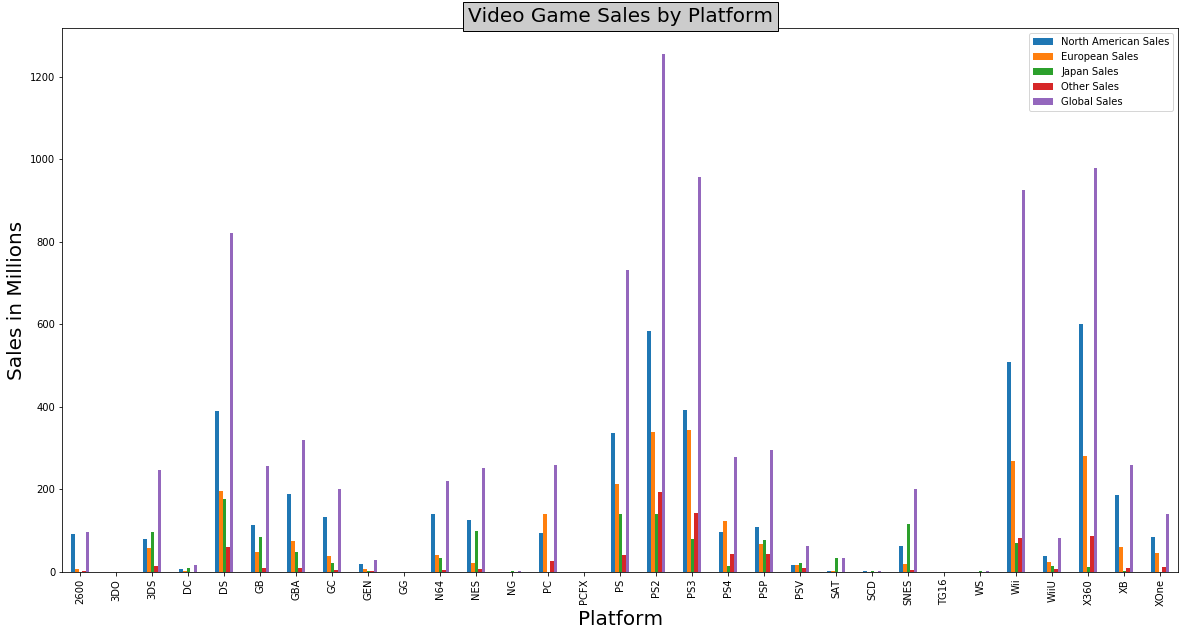

In [6]:
#find the number of sales per platform for each region
platform_df = video_games_df.groupby('Platform')

sales = platform_df[["North American Sales","European Sales","Japan Sales","Other Sales","Global Sales"]].sum()

#Removing insignificant values



video_games_bar = sales.plot(kind="bar", figsize = (20,10), fontsize = 10)
video_games_bar.set_title("Video Game Sales by Platform", bbox ={'facecolor':'0.8', 'pad':5}, fontsize = 20)
video_games_bar.set_xlabel("Platform", fontsize = 20)
video_games_bar.set_ylabel("Sales in Millions", fontsize = 20)



plt.show()
#plt.tight_layout()


In [7]:
#nintendo = video_games_df.loc(['Platform'] = 'Nintendo')
#sorted_platforms_df = platform_df.iloc(["Global Sales"] > 10)
#sorted_platforms_df.head()
ds_data = video_games_df.loc[video_games_df['Platform'] == 'DS', :]
ds_data.head()

,Name,Platform,Year,Genre,Company,North American Sales,European Sales,Japan Sales,Other Sales,Global Sales
Rank,,,,,,,,,,
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
12,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
20,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


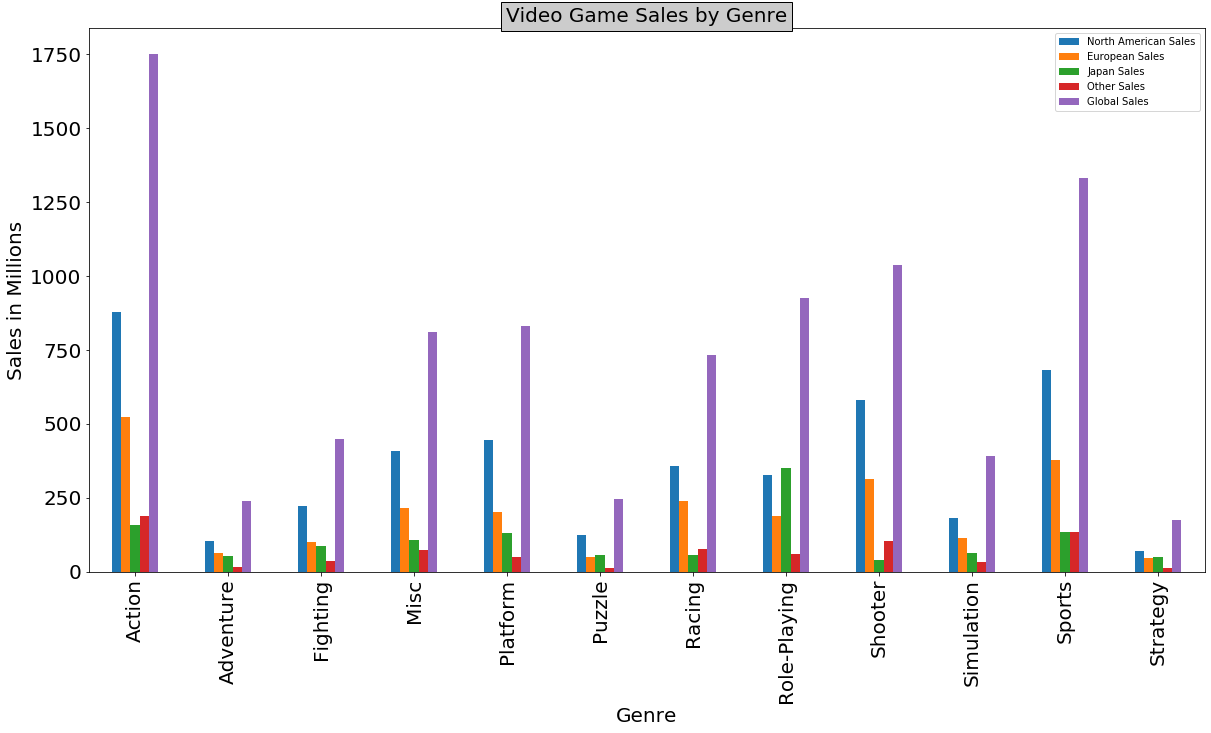

<Figure size 432x288 with 0 Axes>

In [8]:
genre_df = video_games_df.groupby('Genre')
sales_genre = genre_df["North American Sales","European Sales","Japan Sales","Other Sales","Global Sales"].sum()

video_games_genre_bar = sales_genre.plot(kind="bar", figsize = (20,10), fontsize = 20)
video_games_genre_bar.set_title("Video Game Sales by Genre", bbox ={'facecolor':'0.8', 'pad':5}, fontsize = 20)
video_games_genre_bar.set_xlabel("Genre", fontsize = 20)
video_games_genre_bar.set_ylabel("Sales in Millions", fontsize = 20)

plt.show()
plt.tight_layout()

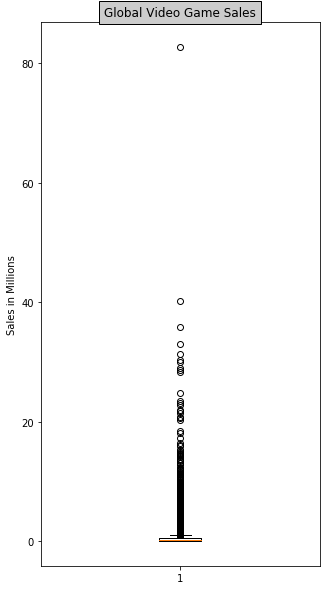

In [9]:
sales = video_games_df['Global Sales']

fig1, ax1 = plt.subplots(figsize = (5,10))
ax1.set_title('Global Video Game Sales', bbox ={'facecolor':'0.8', 'pad':5})
ax1.set_ylabel('Sales in Millions')
ax1.boxplot(sales)
plt.show()

In [10]:
quartiles = sales.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of global sales is: {lowerq}")
print(f"The upper quartile of global sales is: {upperq}")
print(f"The interquartile range of global sales is: {iqr}")
print(f"The the median of global sales is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of global sales is: 0.06
The upper quartile of global sales is: 0.47
The interquartile range of global sales is: 0.41
The the median of global sales is: 0.17 
Values below -0.5549999999999999 could be outliers.
Values above 1.085 could be outliers.


In [14]:
company_group_df = video_games_df.groupby(['Publisher'])
company_gsales_df = pd.DataFrame(company_group_df["Global Sales"].sum())
company_gsales_sorted_df = company_gsales_df.sort_values(by='Global Sales',ascending=False)

companies_df = company_gsales_sorted_df.loc[company_gsales_sorted_df["Global Sales"] > 250]
companies_df

,Global Sales
Publisher,
Nintendo,1786.56
Electronic Arts,1110.32
Activision,727.46
Sony Computer Entertainment,607.50
Ubisoft,474.72
Take-Two Interactive,399.54
THQ,340.77
Konami Digital Entertainment,283.64
Sega,272.99


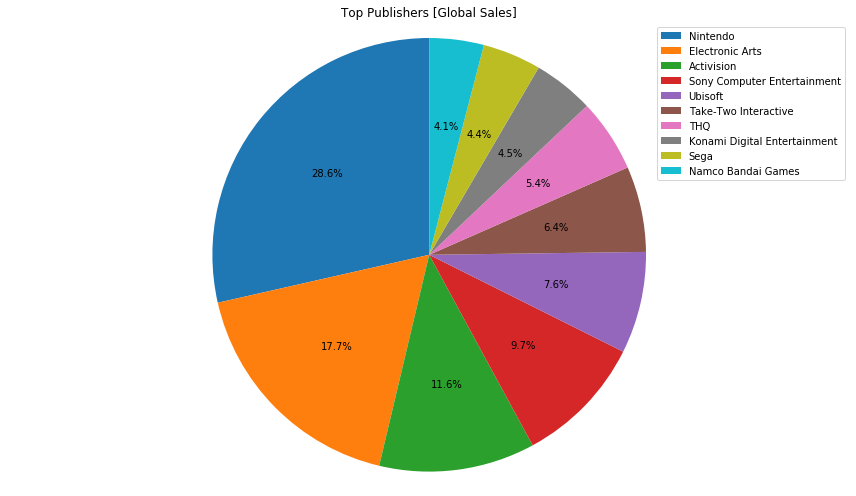

In [15]:
labels = companies_df.index
fig, ax1 = plt.subplots(figsize = (12,7))
ax1.pie(companies_df['Global Sales'], shadow=False, startangle=90,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels, loc='best')
plt.title('Top Publishers [Global Sales]')
plt.tight_layout()
plt.show()

In [16]:
name_group_df = video_games_df.groupby(['Publisher', 'Name','Platform'])
name_global_df = pd.DataFrame(name_group_df["Global Sales"].sum())
name_global_sorted_df = name_global_df.sort_values(by='Global Sales',ascending=False)

global_name_df = name_global_sorted_df.loc[name_global_sorted_df["Global Sales"] > 20]
global_name_df.reset_index()

,Publisher,Name,Platform,Global Sales
0,Nintendo,Wii Sports,Wii,82.74
1,Nintendo,Super Mario Bros.,NES,40.24
2,Nintendo,Mario Kart Wii,Wii,35.82
3,Nintendo,Wii Sports Resort,Wii,33.00
4,Nintendo,Pokemon Red/Pokemon Blue,GB,31.37
5,Nintendo,Tetris,GB,30.26
6,Nintendo,New Super Mario Bros.,DS,30.01
7,Nintendo,Wii Play,Wii,29.02
8,Nintendo,New Super Mario Bros. Wii,Wii,28.62
9,Nintendo,Duck Hunt,NES,28.31


In [17]:
company_group_df = video_games_df.groupby(['Publisher'])
company_na_df = pd.DataFrame(company_group_df["North American Sales"].sum())
company_na_sorted_df = company_na_df.sort_values(by='North American Sales',ascending=False)

na_companies_df = company_na_sorted_df.loc[company_na_sorted_df["North American Sales"] > 100]
na_companies_df

,North American Sales
Publisher,
Nintendo,816.87
Electronic Arts,595.07
Activision,429.70
Sony Computer Entertainment,265.22
Ubisoft,253.43
Take-Two Interactive,220.49
THQ,208.77
Microsoft Game Studios,155.35
Atari,110.04


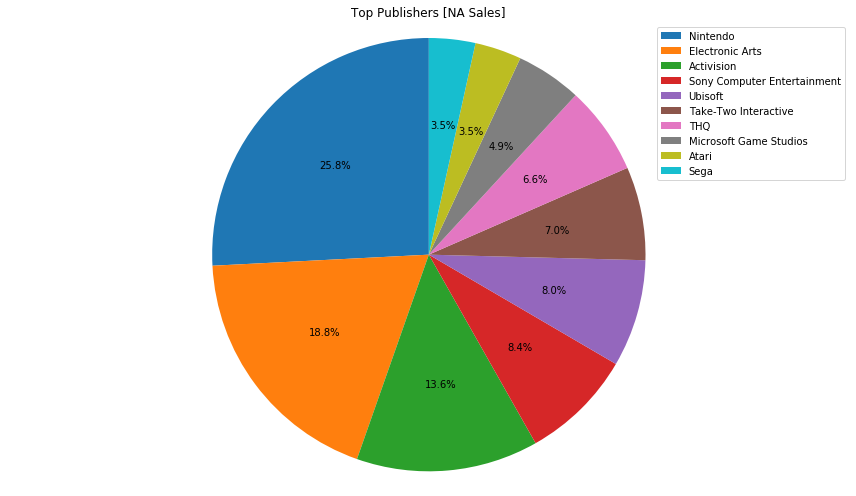

In [18]:
labels = na_companies_df.index
fig, ax1 = plt.subplots(figsize = (12,7))
ax1.pie(na_companies_df['North American Sales'], shadow=False, startangle=90,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels, loc='best')
plt.title('Top Publishers [NA Sales]')
plt.tight_layout()
plt.show()

In [19]:
name_group_df = video_games_df.groupby(['Publisher','Name','Platform'])
name_na_df = pd.DataFrame(name_group_df["North American Sales"].sum())
name_na_sorted_df = name_na_df.sort_values(by='North American Sales',ascending=False)

na_name_df = name_na_sorted_df.loc[name_na_sorted_df["North American Sales"] > 7]
na_name_df.reset_index()

,Publisher,Name,Platform,North American Sales
0,Nintendo,Wii Sports,Wii,41.49
1,Nintendo,Super Mario Bros.,NES,29.08
2,Nintendo,Duck Hunt,NES,26.93
3,Nintendo,Tetris,GB,23.20
4,Nintendo,Mario Kart Wii,Wii,15.85
5,Nintendo,Wii Sports Resort,Wii,15.75
6,Microsoft Game Studios,Kinect Adventures!,X360,14.97
7,Nintendo,New Super Mario Bros. Wii,Wii,14.59
8,Nintendo,Wii Play,Wii,14.03
9,Nintendo,Super Mario World,SNES,12.78


In [20]:
company_group_df = video_games_df.groupby(['Publisher'])
company_euro_df = pd.DataFrame(company_group_df["European Sales"].sum())
company_euro_sorted_df = company_euro_df.sort_values(by='European Sales',ascending=False)

euro_companies_df = company_euro_sorted_df.loc[company_euro_sorted_df["European Sales"] > 60]
euro_companies_df

,European Sales
Publisher,
Nintendo,418.74
Electronic Arts,371.27
Activision,215.53
Sony Computer Entertainment,187.72
Ubisoft,163.32
Take-Two Interactive,118.14
THQ,94.73
Sega,82.00
Konami Digital Entertainment,69.69


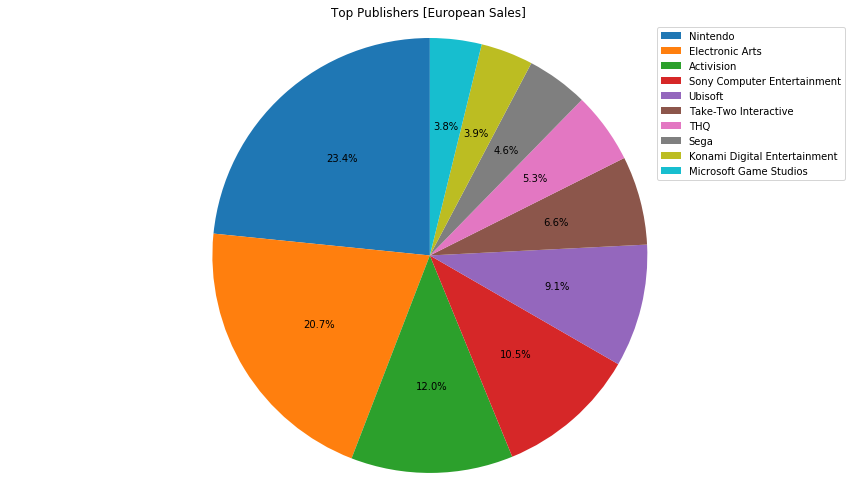

In [21]:
labels = euro_companies_df.index
fig, ax1 = plt.subplots(figsize = (12,7))
ax1.pie(euro_companies_df['European Sales'], shadow=False, startangle=90,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels, loc='best')
plt.title('Top Publishers [European Sales]')
plt.tight_layout()
plt.show()

In [22]:
name_group_df = video_games_df.groupby(['Publisher', 'Name','Platform'])
name_euro_df = pd.DataFrame(name_group_df["European Sales"].sum())
name_euro_sorted_df = name_euro_df.sort_values(by='European Sales',ascending=False)

euro_name_df = name_euro_sorted_df.loc[name_euro_sorted_df["European Sales"] > 5]
euro_name_df.reset_index()

,Publisher,Name,Platform,European Sales
0,Nintendo,Wii Sports,Wii,29.02
1,Nintendo,Mario Kart Wii,Wii,12.88
2,Nintendo,Wii Sports Resort,Wii,11.01
3,Nintendo,Nintendogs,DS,11.00
4,Take-Two Interactive,Grand Theft Auto V,PS3,9.27
5,Nintendo,Brain Age: Train Your Brain in Minutes a Day,DS,9.26
6,Nintendo,New Super Mario Bros.,DS,9.23
7,Nintendo,Wii Play,Wii,9.20
8,Nintendo,Pokemon Red/Pokemon Blue,GB,8.89
9,Nintendo,Wii Fit Plus,Wii,8.59


In [23]:
company_group_df = video_games_df.groupby(['Publisher'])
company_japan_df = pd.DataFrame(company_group_df["Japan Sales"].sum())
company_japan_sorted_df = company_japan_df.sort_values(by='Japan Sales',ascending=False)

japan_companies_df = company_japan_sorted_df.loc[company_japan_sorted_df["Japan Sales"] > 20]
japan_companies_df

,Japan Sales
Publisher,
Nintendo,455.42
Namco Bandai Games,127.07
Konami Digital Entertainment,91.30
Sony Computer Entertainment,74.10
Capcom,68.08
Sega,57.03
Square Enix,49.88
SquareSoft,40.13
Enix Corporation,32.40


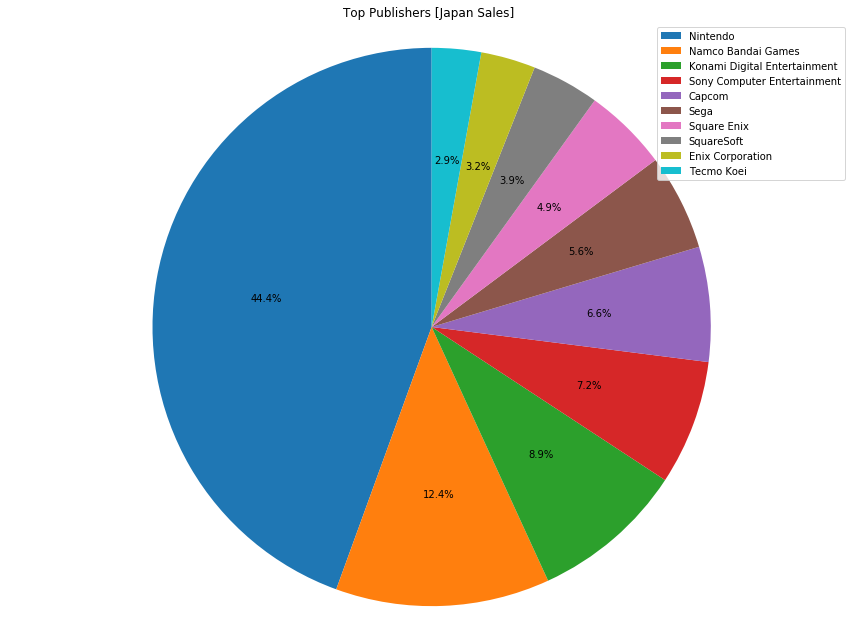

In [24]:
labels = japan_companies_df.index
fig, ax1 = plt.subplots(figsize = (12,9))
ax1.pie(japan_companies_df['Japan Sales'], shadow=False, startangle=90,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels, loc='best')
plt.title('Top Publishers [Japan Sales]')
plt.tight_layout()
plt.show()

In [25]:
name_group_df = video_games_df.groupby(['Publisher', 'Name','Platform'])
name_japan_df = pd.DataFrame(name_group_df["Japan Sales"].sum())
name_japan_sorted_df = name_japan_df.sort_values(by='Japan Sales',ascending=False)

japan_name_df = name_japan_sorted_df.loc[name_japan_sorted_df["Japan Sales"] > 3]
japan_name_df.reset_index()

,Publisher,Name,Platform,Japan Sales
0,Nintendo,Pokemon Red/Pokemon Blue,GB,10.22
1,Nintendo,Pokemon Gold/Pokemon Silver,GB,7.20
2,Nintendo,Super Mario Bros.,NES,6.81
3,Nintendo,New Super Mario Bros.,DS,6.50
4,Nintendo,Pokemon Diamond/Pokemon Pearl,DS,6.04
5,Nintendo,Pokemon Black/Pokemon White,DS,5.65
6,Nintendo,Pokemon Ruby/Pokemon Sapphire,GBA,5.38
7,Nintendo,Animal Crossing: Wild World,DS,5.33
8,Nintendo,Brain Age 2: More Training in Minutes a Day,DS,5.32
9,Capcom,Monster Hunter Freedom 3,PSP,4.87


In [26]:
company_group_df = video_games_df.groupby(['Publisher'])
company_other_df = pd.DataFrame(company_group_df["Other Sales"].sum())
company_other_sorted_df = company_other_df.sort_values(by='Other Sales',ascending=False)

other_companies_df = company_other_sorted_df.loc[company_other_sorted_df["Other Sales"] > 20]
other_companies_df

,Other Sales
Publisher,
Electronic Arts,129.77
Nintendo,95.33
Sony Computer Entertainment,80.45
Activision,75.34
Take-Two Interactive,55.24
Ubisoft,50.26
THQ,32.14
Konami Digital Entertainment,30.31
Sega,24.52


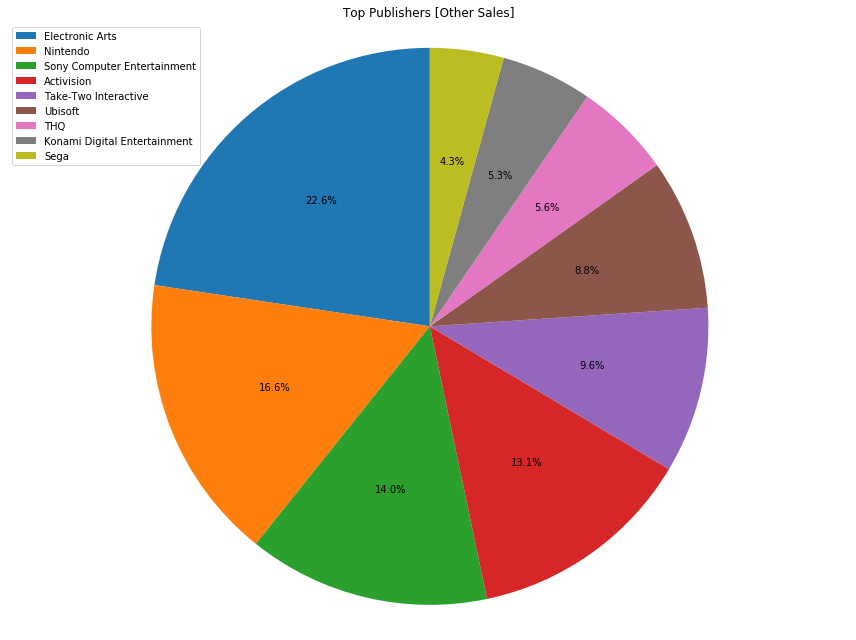

In [27]:
labels = other_companies_df.index
fig, ax1 = plt.subplots(figsize = (12,9))
ax1.pie(other_companies_df['Other Sales'], shadow=False, startangle=90,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels, loc='best')
plt.title('Top Publishers [Other Sales]')
plt.tight_layout()
plt.show()

In [28]:
name_group_df = video_games_df.groupby(['Publisher','Name'])
name_other_df = pd.DataFrame(name_group_df["Other Sales"].sum())
name_other_sorted_df = name_other_df.sort_values(by='Other Sales', ascending=False)

other_name_df = name_other_sorted_df.loc[name_other_sorted_df["Other Sales"] > 2]
other_name_df.reset_index()

,Publisher,Name,Other Sales
0,Take-Two Interactive,Grand Theft Auto: San Andreas,10.72
1,Nintendo,Wii Sports,8.46
2,Take-Two Interactive,Grand Theft Auto V,8.03
3,Sony Computer Entertainment,Gran Turismo 4,7.53
4,Activision,Call of Duty: Black Ops II,3.88
5,Electronic Arts,FIFA Soccer 08,3.53
6,Konami Digital Entertainment,Pro Evolution Soccer 2008,3.51
7,Activision,Call of Duty: Black Ops 3,3.42
8,Activision,Call of Duty: Black Ops,3.36
9,Activision,Call of Duty: Modern Warfare 3,3.35
